In [1]:
import pandas as pd
import numpy as np

In [2]:
excel_data_df = pd.read_excel(r'../data/data.xlsx')

In [3]:
for idx, header in enumerate(excel_data_df.columns.tolist()):
    print(idx, header)

0 Dấu thời gian
1 1. Bạn tên là 
2 2. Ngày sinh
3 3. Số điện thoại
4 4. Bạn đến từ trường nào
5 5. Bạn đang là sinh viên:
6 6. MSSV
7 7. Link Facebook
8 8. Outlook
9 9. Gmail
10 10. Trình độ tiếng anh
11 11. Bạn mong muốn tham gia vào ban
12 1. CV của bạn:
13 3. Bạn đang quan tâm về lĩnh vực nào? Bạn đã biết gì về lĩnh vực này?
14 4. Bạn có dự án nào không? Nếu có, bạn hãy điền link Github có những dự án của bạn?
15 6. Bạn nghĩ mình có thể đóng góp gì cho SINNO với tư cách là thành viên ban Chuyên Môn?
16 7. Ngoài mong muốn được học hỏi, bạn còn có mong muốn gì khi trở thành một thành viên của ban Chuyên Môn?
17 8. Hãy nêu chi tiết một ý tưởng về công nghệ mà bạn đang muốn thực hiện.
18 1. Bạn đã từng làm cán bộ lớp hoặc tham gia các tổ chức, CLB, Đội nào chưa? Vai trò của bạn là gì?
19 2. Khi ở một môi trường mới, bạn có hòa đồng/chủ động làm quen với những người xung quanh không? Cho chúng mình biết lý do nhé.
20 3. Mức thành thạo tin học văn phòng (Word, Excel,...)
21 4. Link một Pl

In [4]:
excel_data_df.fillna("", inplace = True)

In [5]:
import sys; sys.path.insert(0, '..')
from app.loader import loader
from app.ssmc_fcm import SSMC_FCM

/home/hoangtc125/.local/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


--- Algo Clustering Config:
 {
    "SERVICE_NAME": "ALGO_CLUSTERING",
    "STOPWORD_PATH": "/media/hoangtc125/E/DATN/algo-clustering-service/resources/vn_stopword.txt",
    "FEATURES_PATH": "/media/hoangtc125/E/DATN/algo-clustering-service/resources/features.txt"
}
No GPU available, using the CPU instead.


Some weights of the model checkpoint at vinai/phobert-base were not used when initializing RobertaModel: ['lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.decoder.bias', 'lm_head.dense.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [6]:
raw_field18 = excel_data_df.iloc[:, 18].tolist()
field18 = loader.feature_engineering(raw_field18)
field18.shape

(145, 768)

In [7]:
raw_field19 = excel_data_df.iloc[:, 19].tolist()
field19 = loader.feature_engineering(raw_field19)
field19.shape

(145, 768)

In [8]:
raw_field20 = excel_data_df.iloc[:, 20].tolist()
field20 = [[i] for i in raw_field20]
field20 = loader.multilabel_binarizing(field20)
field20.shape

(145, 4)

In [9]:
raw_field21 = excel_data_df.iloc[:, 21].tolist()
field21 = loader.feature_engineering(raw_field21)
field21.shape

(145, 768)

In [10]:
dataset = np.hstack((field18, field19, field20, field21))
data_field_len = [field18.shape[1], field19.shape[1], field20.shape[1], field21.shape[1]]
dataset.shape, data_field_len
# excel_data_df = excel_data_df[(excel_data_df["11. Bạn mong muốn tham gia vào ban"] == "Nhân sự")]

((145, 2308), [768, 768, 4, 768])

Supervised percentage: 0.0% (0:145)
Cluster members: 
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 121, 125, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144]
[101, 104, 105, 106, 107, 108, 110, 111, 115, 116, 120, 123, 126, 127, 129, 130]
[103, 109, 112, 113, 114, 117, 118, 119, 122, 124, 128]


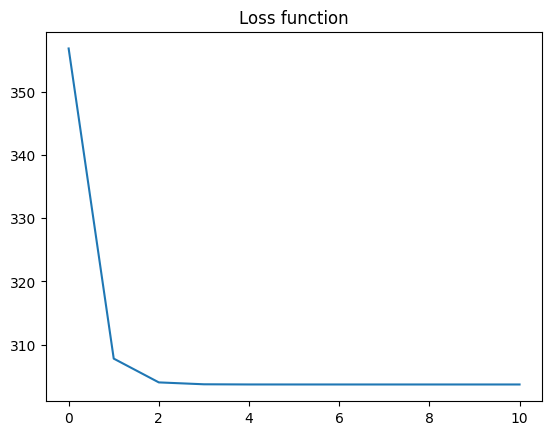

loss functions: 
[356.8704765412413, 307.77784941130864, 304.0138829659645, 303.7148461249558, 303.68754673267074, 303.68493210428755, 303.68466514865617, 303.6846340859165, 303.68462968061294, 303.6846289212775, 303.68462877285526]


In [33]:
supervised_set = [
]
ssmc_fcm = SSMC_FCM(
    dataset=dataset, 
    fields_len=data_field_len,
    fields_weight=[1, 1, 1, 1],
    n_clusters=3, 
    supervised_set=supervised_set, 
)
ssmc_fcm.clustering()
ssmc_fcm.show_cluster_members()
ssmc_fcm.show_loss_function()

In [35]:
excel_data_df.loc[ssmc_fcm.pred_labels[1]].iloc[:, [1, 18, 19, 20, 21]]

,1. Bạn tên là,"1. Bạn đã từng làm cán bộ lớp hoặc tham gia các tổ chức, CLB, Đội nào chưa? Vai trò của bạn là gì?","2. Khi ở một môi trường mới, bạn có hòa đồng/chủ động làm quen với những người xung quanh không? Cho chúng mình biết lý do nhé.","3. Mức thành thạo tin học văn phòng (Word, Excel,...)",4. Link một Plan/MasterPlan bạn đã từng làm
101,Đỗ Duy Hùng,vc,Rất tốt,Tốt,vc
104,Đường Minh Quân,"Mình đã từng làm cán bộ lớp, cụ thể là lớp trư...","Bản thân mình là một người khá là cởi mở, thíc...",Bình thường,https://docs.google.com/spreadsheets/d/13UPSeA...
105,Nguyễn Quang Duy,Có tham gia,Có,Tốt,Thành viên giúp b trong lop cntt
106,Nguyễn Anh Luận,Bản thân em đã từng tham gia 2 CLB (1 trong tr...,"Khi ở một môi trường mới, tất nhiên là em sẽ c...",Nhập môn,https://docs.google.com/spreadsheets/d/1oaqyjw...
107,Trần Quang Phúc,"Đã từng làm ở cấp 2. Vai trò lớp trưởng, lớp p...",Có. Vì làm quen với mọi người sẽ giúp việc học...,Bình thường,Đã từng cùng một nhóm bạn thành lập câu lạc bộ...
108,Nguyễn Thu Hà,Mình đã từng làm lớp trưởng hồi phổ thông và k...,Mình được đánh giá là một người khá chủ động v...,Tốt,Mình chưa từng viết Plan/MasterPlan nhưng sẵn ...
110,Lương Đức Trọng,Mình từng làm lớp phó học tập hồi cấp 2 và tha...,"Ở một môi trường mới, mình luôn muốn làm quen ...",Tốt,các plan mình đã tham gia không lưu dưới dạng ...
111,Lưu Minh Thắng,"Em đã từng làm lớp trưởng, cấp 3 em cũng tham ...",Mọi người nhận xét em là một con người dễ gần ...,Bình thường,Em chưa có tham gia các Plan/MasterPlan về CNT...
115,Nguyễn Doãn Tùng Lâm,Đã và đang là thành viên CLB Tiếng Anh ITEC vi...,Có ! Vì em cho rằng làm quen những người bạn m...,Nhập môn,Do không thể tìm lại toàn bộ file ghi plan nên...
116,Tạ Hữu Bình,Mình làm phó ban Học tập và Nghiên cứu khoa họ...,"Mình mong được làm quen, hơp tác với mọi người...",Bình thường,Mình thường quản lý công việc nhóm thông qua e...


In [36]:
excel_data_df.loc[ssmc_fcm.pred_labels[2]].iloc[:, [1, 18, 19, 20, 21]]

,1. Bạn tên là,"1. Bạn đã từng làm cán bộ lớp hoặc tham gia các tổ chức, CLB, Đội nào chưa? Vai trò của bạn là gì?","2. Khi ở một môi trường mới, bạn có hòa đồng/chủ động làm quen với những người xung quanh không? Cho chúng mình biết lý do nhé.","3. Mức thành thạo tin học văn phòng (Word, Excel,...)",4. Link một Plan/MasterPlan bạn đã từng làm
103,Nguyễn Nam Hải,Em đã từng giữ chức Lớp trưởng năm cấp 2 và Tổ...,"Ban đầu, khi mới gặp mặt, em thường ít giao ti...",Bình thường,
109,Kim Ngọc Chung,"Em có ạ, em từng là lớp trưởng và đang là thàn...",em muốn làm quen những người xung quanh vì muố...,Nhập môn,em chưa có ạ
112,Nguyễn Thị Hồng Loan,Em đã từng làm lớp phó 3 năm nhưng mà là cấp 2...,Em là một người khá rụt rè và khó thích ứng vớ...,Bình thường,chưa có ạ
113,Trần Thanh Trường,Mình đã từng tham gia ban thanh niên tình nguy...,Bản thân mình là một người khá là hòa đồng và ...,Nhập môn,
114,Nguyễn Minh Tú,"Hiện tại, em đã tham gia và đang là tình nguyệ...","Trong môi trường mới, em luôn cố gắng làm quen...",Tốt,
117,Đỗ Thị Ngọc Anh,- Lớp trưởng lớp đại học\n- Phó ban tài chính ...,Khi ở một môi trường mới tôi thấy bản thân mìn...,Nhập môn,
118,Nguyễn Xuân Phong,Hồi cấp 3 có làm bí thư hồi lớp 10,"Có, theo mình thì truyền đi năng lượng tích cự...",Bình thường,
119,Nguyễn Tiến Đức,Em đang làm cán bộ lớp,"Dạ em sẽ chủ động làm quen với người mới, bởi ...",Bình thường,
122,Lê Đức Anh,Mình đã tham gia Đội tình nguyện hội sinh viên...,Ở một môi trường mới thì mình luôn chủ động là...,Bình thường,Hiện tại thì mình chưa có plan nào ạ
124,Hoàng Thị Hằng,Bí thư+lớp trưởng,Nếu cảm thấy quý sẽ chủ động làm quen,Bình thường,
